In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn import tree
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
date_columns = [204, 75, 73, 217, 158, 159, 156, 157, 176, 177, 178, 179, 166, 167, 168, 169]
def parse_date(x):
    return pd.to_datetime(x, format="%d%b%y:%H:%M:%S")  

In [3]:
raw_data = pd.read_csv('train.csv',                    
                   parse_dates=date_columns,
                   date_parser = parse_date)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (8,9,10,11,12,43,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train = raw_data.drop(['ID', 'target'], axis=1)

In [5]:
row_count = sum(1 for line in open('train.csv'))
print("Rows: %d ; Columns: %d" % (row_count, len(train.columns)))

Rows: 145232 ; Columns: 1932


In [6]:
1.0 - train.count().sum() / double(len(train.columns) * len(train))

0.012515729029271339

In [7]:
num_unique_vals = pd.DataFrame([[c, len(train[c].unique())] for c in train.columns], 
                               columns=['column', 'unique_vals']).set_index('column')
constant_vals = num_unique_vals[num_unique_vals['unique_vals'] == 1]
constant_vals

,unique_vals
column,
VAR_0207,1
VAR_0213,1
VAR_0840,1
VAR_0847,1
VAR_1428,1


In [8]:
train = train.drop(constant_vals.index, axis=1)

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_numr = train.select_dtypes(include=numerics)
train_char = train.select_dtypes(include=['object'])
train_dates = train.select_dtypes(include=['datetime'])

print("Numerical Count: %d, Character Count: %d, Time Count: %d" %
      (len(train_numr.columns), len(train_char.columns), len(train_dates.columns)))

Numerical Count: 1876, Character Count: 35, Time Count: 16


In [12]:
for c in train_char.columns:
    unique_values = train_char[c].unique()
    if len(unique_values) < 20: 
        weights = [{"column": x, "weight": (train_char[c] == x).sum() / float(len(train_char[c]))} for x in unique_values]
        sorted_values = sorted(weights, key=lambda x: -x['weight'])
        sorted_values_strings = ["%s:%.3f" % (s['column'],s['weight']) for s in sorted_values]
        print("%s: Unique Values: %d, %s" % (c, len(unique_values), sorted_values_strings[:4]))

VAR_0001: Unique Values: 3, ['R:0.585', 'H:0.412', 'Q:0.004']
VAR_0005: Unique Values: 4, ['B:0.492', 'C:0.374', 'N:0.114', 'S:0.020']
VAR_0008: Unique Values: 2, ['False:1.000', 'nan:0.000']
VAR_0009: Unique Values: 2, ['False:1.000', 'nan:0.000']
VAR_0010: Unique Values: 2, ['False:1.000', 'nan:0.000']
VAR_0011: Unique Values: 2, ['False:1.000', 'nan:0.000']
VAR_0012: Unique Values: 2, ['False:1.000', 'nan:0.000']
VAR_0043: Unique Values: 2, ['False:1.000', 'nan:0.000']
VAR_0044: Unique Values: 2, ['[]:1.000', 'nan:0.000']
VAR_0196: Unique Values: 2, ['False:1.000', 'nan:0.000']
VAR_0202: Unique Values: 2, ['BatchInquiry:1.000', 'nan:0.000']
VAR_0214: Unique Values: 13, ['HRE-Home Phone-0621:0.000', 'HRE-Social Security Number-1373:0.000', 'HRE-Social Security Number-1289:0.000', 'HRE-Social Security Number-1747:0.000']
VAR_0216: Unique Values: 2, ['DS:1.000', 'nan:0.000']
VAR_0222: Unique Values: 2, ['C6:1.000', 'nan:0.000']
VAR_0226: Unique Values: 3, ['False:0.996', 'True:0.003', 

In [13]:
train_char = train_char.replace('-1', np.NaN)

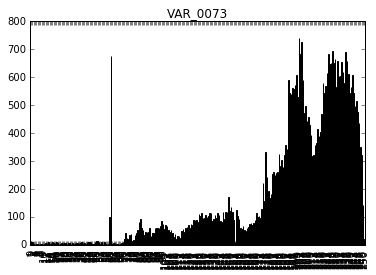

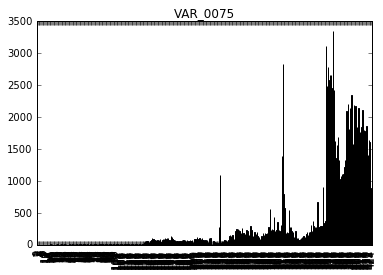

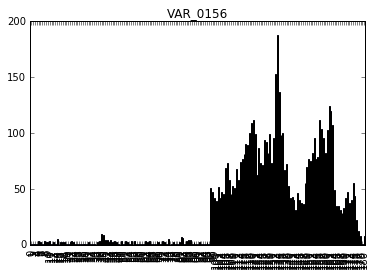

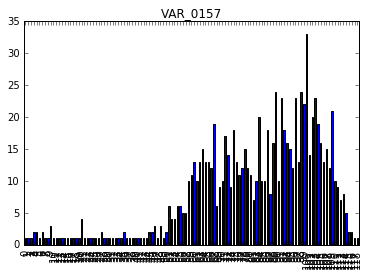

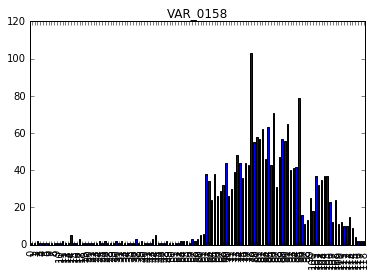

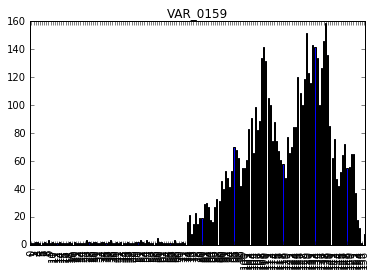

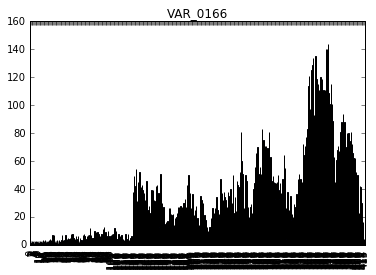

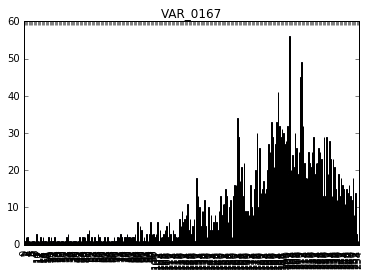

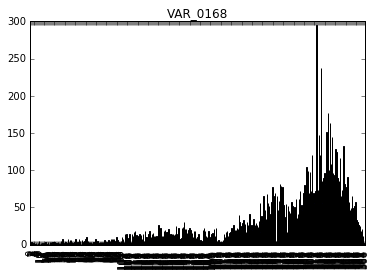

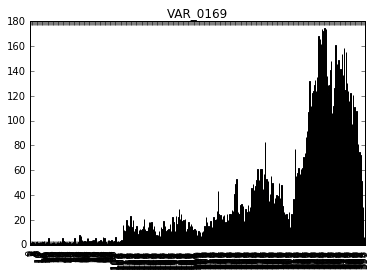

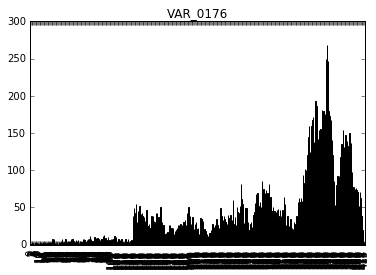

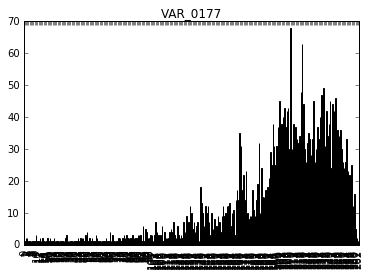

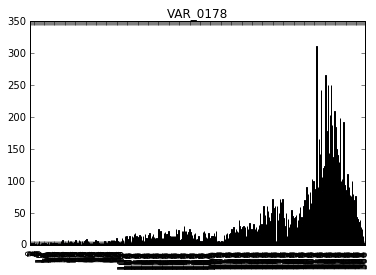

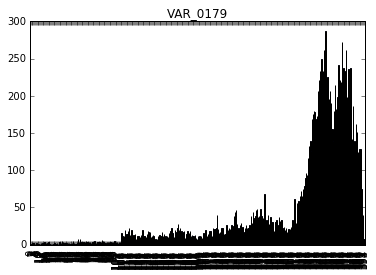

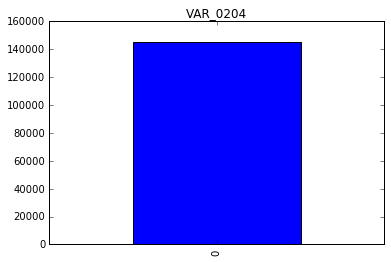

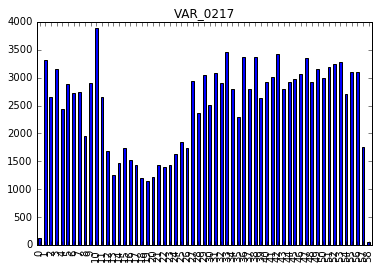

In [14]:
for c in train_dates.columns:    
    counts = train_dates[c].groupby([train_dates[c].dt.year, 
                                 train_dates[c].dt.week]
                          ).count()

    counts.plot(kind="bar", use_index=False, title=c
                                #figsize=(5,4),
                                #ax=axs[i]
                )   
    show()

In [15]:
c = pd.concat([train_char['VAR_0237'].value_counts(), train_char['VAR_0274'].value_counts()], axis=1)
c.columns=['VAR_0237', 'VAR_0274']
c.sort('VAR_0237', ascending=False)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,VAR_0237,VAR_0274
CA,15770,16258
TX,14186,11989
NC,11691,8427
GA,8730,6006
IL,8479,9262
VA,8081,6366
OH,7307,7860
FL,7004,5562
PA,6937,7008
SC,6083,5030


In [16]:
ranges = pd.DataFrame([ [c, "[%d:%d]" % (train_numr[c].min(), train_numr[c].max())] for c in train_numr.columns ], columns=['column', 'range'])
ranges['range'].value_counts()

[0:99]               446
[0:999999999]        211
[0:999]              186
[0:9999]             143
[1:999]               51
[0:1]                 38
[-1:1]                33
[0:0]                 30
[0:3]                 26
[0:6]                 22
[0:2]                 21
[0:4]                 18
[1:999999999]         17
[1:9999]              16
[0:9]                 13
[-1:960]              12
[1:99]                12
[0:10]                12
[0:8]                 11
[0:12]                10
[0:5]                  9
[0:90]                 9
[0:13]                 8
[0:11]                 8
[-99999:18]            8
[2:999999999]          7
[0:14]                 7
[-99999:6]             7
[-1:99]                7
[0:7]                  7
                    ... 
[0:210]                1
[0:104]                1
[-99999:23]            1
[0:54]                 1
[2471:2471]            1
[0:143]                1
[-99999:307]           1
[572:999999999]        1
[0:1579358]            1


In [17]:
import random
train_numr_samp = train_numr[random.sample(train_numr.columns,100)]
corr = train_numr_samp.corr()

TypeError: Population must be a sequence or set.  For dicts, use list(d).

In [18]:
import matplotlib.pyplot as plt

pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this 

plt.pcolor(corr, cmap='RdBu', vmin=-1, vmax=1)
plt.title('pcolor')
# set the limits of the plot to the limits of the data
# plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()

NameError: name 'corr' is not defined